# Лабораторная работа Logistic map
## Hard level

Для работы будет использоваться Python с библиотеками numpy для вычислений и matplotlib для графического представления.

In [132]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
def logistic_map(x, r):
	"""
		Функция одномерного логистического отображения.
		x: x_n
		r: параметр
		возвращаемое значение: x_{n+1}
	"""
	return r * x * (1 - x)

In [134]:
def g_map(x, r):
	"""
		Функция перехода g_{n+1}
		x: x_n
		r: параметр
		возвращаемое значение: x_{n+1}
	"""
	return r * x * (1 - x) * (3 - x)

In [135]:
def sequence_iterate(x0, r, amount):
    """
    Функция генерации numpy массива из некоторых последовательных элементов {x_n}
    x0: первый элемент массива
    r: параметр
    amount: кол-во элементов
    возвращаемое значение: numpy.array
    """
    x_list = [x0]
    x_cur = x0
    for _ in range(amount):
        x_cur = logistic_map(x_cur, r)
        x_list.append(x_cur)
    return np.array(x_list)

### Исследование циклов при $r \in (3, r_{\infty})$

Пусть $r_{\infty} \approx 3.5699456$

Необходимо:
1. Изучить изменение длины цикла при $r \in (3, r_{\infty})$
2. Установить какие ограничения действуют на $m$ при $r \in (3, r_{\infty})$

Циклы периоды $m$ являются корнями уравнения:
$$f^m(x) = x,$$
которые не являются корнями для уравнений меньших периодов (т.е. для $f^d(x) = x$, где $d$ - делитель $m$)

Искать циклы будем экспериментальным путем:
1. Зададим какое-то начальное значение $x_0$
2. Проверим $x_n$ для таких $n$, что $N < n < N + L$, где $N$ - некоторое большое число, $L$ - количество проверяемых значений
3. На каждой итерации будем проверять уникальность текущего значения, если уникально - продолжаем, если нет - найден цикл

In [136]:
def find_cycle(r, x0=0.2, N=10000, k=256, eps=1e-6):
    """
      Функция поиска цикла длины m
      x0: начальное значение x
      N: рассматриваем значения x_n только для n \ge N, чтобы выявить закономерность без влияния x0
      k: количество рассматриваемых значений после N
      eps: эпсилон 10^{-6}
      возвращаемое значение: кортеж (m, u) - длина цикла и элементы соответственно
    """
    # Предподсчет значений x_n до N
    x = x0
    for _ in range(N):
        x = logistic_map(x, r)
    
		# Итерируемся по следующим значениям x_n, запоминая уникальные и проверяя на "схлопывание" цикла (т,е. близкое значение (diff < eps) уже попадалось)
    uniques = []
    for _ in range(k):
        x = logistic_map(x, r)

        flag = False
        for i, u in enumerate(uniques):
            if abs(u - x) < eps:
                # Для надежности проверки равенства через diff < eps проверку добавляем значение усредненным между u и x
                uniques[i] = 0.5 * (u + x)
                flag = True
                break
        if not flag:
            uniques.append(x)
    m = len(uniques)
    return m, uniques

<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\idarb\AppData\Local\Temp\ipykernel_23080\1695464373.py:2: SyntaxWarning: invalid escape sequence '\g'
  """


In [137]:
r_vars = [2, 3.1, 3.3, 3.5, 3.54, 3.56, 3.565, 3.5699]
for r in r_vars:
    m, uniq = find_cycle(r)
    print(f"r = {r:.3f}, примерно m = {m}")

r = 2.000, примерно m = 1
r = 3.100, примерно m = 2
r = 3.300, примерно m = 2
r = 3.500, примерно m = 4
r = 3.540, примерно m = 4
r = 3.560, примерно m = 8
r = 3.565, примерно m = 16
r = 3.570, примерно m = 128


Видим, что при изменении $r$ меняется длина цикла.\
Вблизи $r_{\infty} \approx 3.5699456$ можно заметить большие степени двойки.

In [138]:
r_min, r_max = 3.01, 3.5699456  # r∞ ≈ 3.5699456...
step = 0.0005

r_list = []
m_list = []

r = r_min
while r <= r_max:
    m, _ = find_cycle(r)
    r_list.append(r)
    m_list.append(m)
    r += step

print(f"Уникальные m на заданном интервале для r с шагом .0005")
print(sorted(set(m_list)))

Уникальные m на заданном интервале для r с шагом .0005
[2, 4, 8, 16, 32]


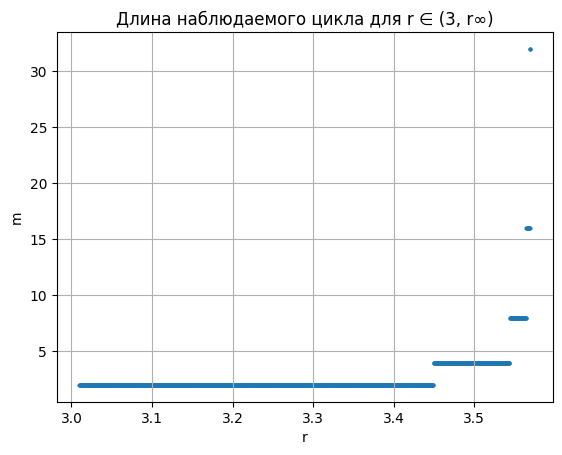

In [139]:
plt.figure()
plt.scatter(r_list, m_list, s=4)
plt.xlabel("r")
plt.ylabel("m")
plt.title("Длина наблюдаемого цикла для r ∈ (3, r∞)")
plt.grid(True)
plt.show()

**Ограничения на $m$**\
Экспериментально получили, что циклы с периодами не являющимися степенями двойки в этом интервале не возникают

### Лестница Ламерея

Необходимо:
1. Построить лестницу Ламерея для некоторого $r$
2. Изучить циклы на графике

Для построения лестницы будем итерироваться по состояниям следующим образом:
1. Вертикально: $y_{new}=f(x)$. Рисуется отрезок $(x, y) \rarr (x, y_{new})$
2. Горизонтально: рисуется отрезок $(x, y_{new}) \rarr (y_{new}, y_{new})$
3. Обновляем состояние: $(y_{new}, y_{new}) \rarr (x, y)$
4. Повторяем $N$ раз

In [140]:
def lameray(r, x0=0.2, N=50, curve_dots=400):
    """
    Функция для построения лестницы Ламерея для логистического отображения
    при заданном параметре r и начальном значении x0.
    curve_dots: количество точек кривой
    """

    xs = np.linspace(0, 1, curve_dots)
    ys = logistic_map(xs, r)

    fig, ax = plt.subplots(figsize=(6, 6))

    ax.plot(xs, ys, label=r"$x_{n+1} = r x_n (1 - x_n)$")
    ax.plot(xs, xs, linestyle="--", label=r"$x_{n+1} = x_n$")

		# Стартовое состояние
    x = x0
    y = 0.0 

    for _ in range(N):
        # Шаг по вертикали
        y_new = logistic_map(x, r)
        ax.plot([x, x], [y, y_new])

        # Шаг по горизонтали
        ax.plot([x, y_new], [y_new, y_new])  

        # Обновление
        x, y = y_new, y_new
       
    # Отображение 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel(r"$x_n$")
    ax.set_ylabel(r"$x_{n+1}$")
    ax.set_title(fr"$r = {r}, x_0 = {x0}$")
    ax.legend()
    ax.grid(True)

    plt.show()

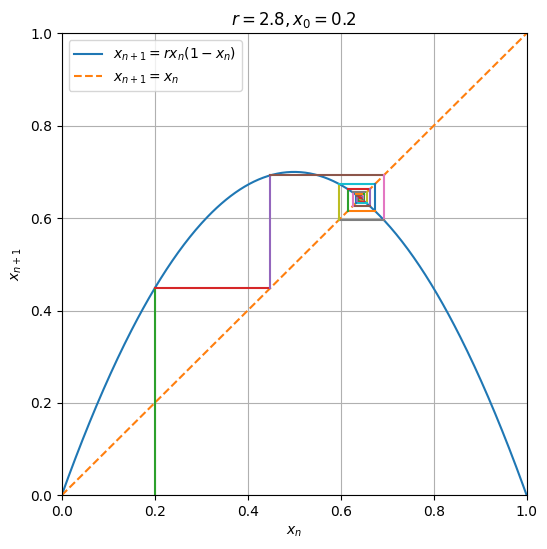

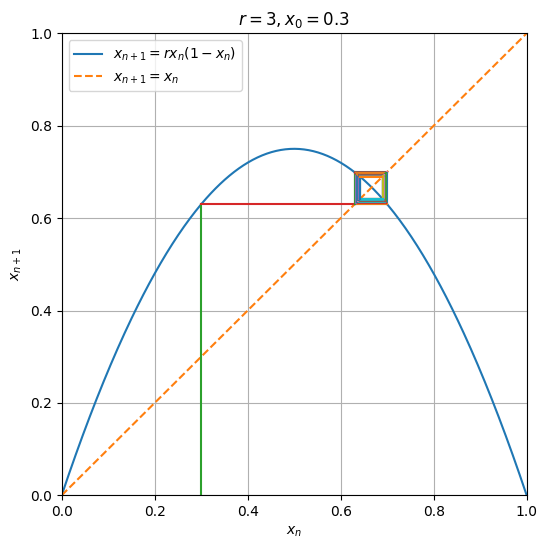

In [141]:
lameray(r=2.8)
lameray(r=3, x0=.3)

На графике циклы выглядят как замкнутный многоугольник, который повторяется бесконечно.
- Вертикальные отрезки соединяют $(x_k^*,x_k^*) \rarr (x_k^*,x_{k+1}^*)$
- Горизонтальные: $(x_k^*,x_{k+1}^*) \rarr (x_{k+1}^*,x_{k+1}^*)$

### Исследование циклов $g(x_n)$

Аналогично поиску циклов ранее повторим алгоритм:\
Проитерируемся по значениям $x_n$ после какого-то большого $N$ и посмотрим на поведение.

In [161]:
def g_find_cycle(r, x0=0.2, N=10000, k=128, eps=1e-8):
    """
      (Функция идентична приведенной ранее, заменена лишь функция перехода)
      Функция поиска цикла длины m
      x0: начальное значение x
      N: рассматриваем значения x_n только для n \ge N, чтобы выявить закономерность без влияния x0
      k: количество рассматриваемых значений после N
      eps: эпсилон 10^{-6}
      возвращаемое значение: кортеж (m, u) - длина цикла и элементы соответственно
    """
    # Предподсчет значений x_n до N
    x = x0
    for _ in range(N):
        x = g_map(x, r)
    
	# Итерируемся по следующим значениям x_n, запоминая уникальные и проверяя на "схлопывание" цикла (т,е. близкое значение (diff < eps) уже попадалось)
    uniques = []
    for _ in range(k):
        x = g_map(x, r)

        flag = False
        for i, u in enumerate(uniques):
            if abs(u - x) < eps:
                # Для надежности проверки равенства через diff < eps проверку добавляем значение усредненным между u и x
                uniques[i] = 0.5 * (u + x)
                flag = True
                break
        if not flag:
            uniques.append(x)
    m = len(uniques)
    return m, uniques

<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\idarb\AppData\Local\Temp\ipykernel_23080\1264532610.py:2: SyntaxWarning: invalid escape sequence '\g'
  """


In [162]:
r_vars = [.2, .5, 1.2, 1.4, 1.5]
for r in r_vars:
    m, uniq = g_find_cycle(r)
    print(f"r = {r:.2f}, примерно m = {m}")

r = 0.20, примерно m = 1
r = 0.50, примерно m = 1
r = 1.20, примерно m = 2
r = 1.40, примерно m = 8
r = 1.50, примерно m = 128


In [165]:
gr_min= 0.01
gr_max= 27 / (2 * (7*np.sqrt(7) - 10))
step = 0.005

gr_list = []
gm_list = []

gr = gr_min
while gr <= gr_max:
    m, _ = g_find_cycle(gr)
    gr_list.append(gr)
    gm_list.append(m)
    gr += step
    
print(sorted(set(gm_list)))


[1, 2, 3, 4, 5, 6, 8, 9, 10, 24, 128]


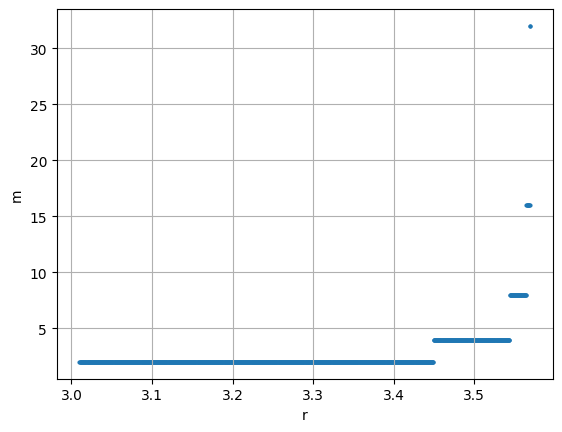

In [164]:
plt.figure()
plt.scatter(r_list, m_list, s=4)
plt.xlabel("r")
plt.ylabel("m")
plt.grid(True)
plt.show()

График похож на график логистического отображения.\
В обоих случаях наблюдается последовательное удвоение длины цикла по приближению к границе интервала $r$.

Ключевое различие в сдвиге диапазона,\
В логистистическом отображении сильный рост периода циклов возникает по приближению к $\sim 3.56$,\
В то время как в этом случае схожая ситуация возникает уже при $r \approx 1.5$